## Lab 3 (Draft) - Joy First

# Introduction

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

You may work in a team of up to 3 students. This is not a requirement, but we strongly encourage you to form a group and believe it will add considerable value to the exercise.

When working in a group, do not use a "division-of-labor" approach to complete the lab. All students should participate in all aspects of the final report.

# Important Concepts

* [What is Panel Data?](https://en.wikipedia.org/wiki/Panel_data)

* [What are Instrumental Variables (IVs)?](http://cameron.econ.ucdavis.edu/e240a/ch04iv.pdf)

* [What is the relationship between covariates and explanatory variables?](https://www.quora.com/What-is-the-difference-between-independent-variables-and-covariate-variables)

* [What is multicollinearity?](http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/)

# Data Code Book

variable  | label
----------|------
1    county|               county identifier
2      year|                            1987
3    crmrte|     crimes committed per person
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
10    taxpc|          tax revenue per capita
11     west|           =1 if in western N.C.
12  central|           =1 if in central N.C.
13    urban|                   =1 if in SMSA
14 pctmin80|            perc. minority, 1980
15     wcon|       weekly wage, construction
16     wtuc|    wkly wge, trns, util, commun
17     wtrd| wkly wge, whlesle, retail trade
18     wfir|    wkly wge, fin, ins, real est
19     wser|      wkly wge, service industry
20     wmfg|         wkly wge, manufacturing
21     wfed|         wkly wge, fed employees
22     wsta|       wkly wge, state employees
23     wloc|        wkly wge, local gov emps
24      mix| offense mix: face-to-face/other
25  pctymle|              percent young male

In the literature on crime, researchers often distinguish between the certainty of punishment (do criminals expect to get caught and face punishment) and the severity of punishment (for example, how long prison sentences are).  The former concept is the motivation for the 'probability' variables.  The probability of arrest is proxied by the ratio of arrests to offenses, measures drawn from the FBI's Uniform Crime Reports.  The probability of conviction is proxied by the ratio of convictions to arrests, and the probability of prison sentence is proxied by the convictions resulting in a prison sentence to total convictions.  The data on convictions is taken from the prison and probation files of the North Carolina Department of Correction.

The percent young male variable records the proportion of the population that is male and between the ages of 15 and 24.  This variable, as well as percent minority, was drawn from census data.

The number of police per capita was computed from the FBI's police agency employee counts.

The variables for wages in different sectors were provided by the North Carolina Employment Security Commission.

# Load the Data

In [1]:
# general setup
# List of packages maybe needed for this analysis
pkg <- c("psych","reshape2","dplyr","e1071","ggplot2", 
         "knitr","GGally", "stargazer", "DT", "xtable",
         "leaps","fmsb", "lmtest", "DT", "car","XML", "caTools","ROCR", 
         "MASS", "sjPlot","sjmisc","sjlabelled","readxl","Hmisc","corrplot","jtools","ggfortify")

# Check if packages are not installed and assign the
# names of the packages not installed to the variable new.pkg
new.pkg <- pkg[!(pkg %in% installed.packages())]


# If there are any packages in the list that aren't installed,
# install them
if (length(new.pkg)) {
  install.packages(new.pkg, repos = "http://cran.rstudio.com")
}

# activate packages 
load.pkg <- suppressWarnings(lapply(pkg, require, character.only=TRUE) )

Installing packages into 'C:/Users/crisb/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'gdata', 'KernSmooth', 'TMB', 'Matrix', 'emmeans', 'lifecycle', 'mnormt', 'foreign', 'lattice', 'nlme', 'bitops', 'gplots', 'bayestestR', 'effectsize', 'ggeffects', 'glmmTMB', 'insight', 'parameters', 'performance', 'sjstats', 'tidyr', 'pander'



package 'gdata' successfully unpacked and MD5 sums checked
package 'KernSmooth' successfully unpacked and MD5 sums checked
package 'TMB' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'emmeans' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'foreign' successfully unpacked and MD5 sums checked
package 'lattice' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'bayestestR' successfully unpacked and MD5 sums checked
package 'effectsize' successfully unpacked and MD5 sums checked
package 'ggeffects' successfully unpacked and MD5 sums checked
package 'glmmTMB' successfully unpacked and MD5 sums checked
package 'insight' succes

Warning message:
"cannot remove prior installation of package 'tidyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\crisb\OneDrive\Documents\R\win-library\3.6\00LOCK\tidyr\libs\x64\tidyr.dll to C:\Users\crisb\OneDrive\Documents\R\win-library\3.6\tidyr\libs\x64\tidyr.dll: Permission denied"Warning message:
"restored 'tidyr'"

package 'pander' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'fmsb' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'sjPlot' successfully unpacked and MD5 sums checked
package 'sjmisc' successfully unpacked and MD5 sums checked
package 'sjlabelled' successfully unpacked and MD5 sums checked
package 'corrplot' successfully unpacked and MD5 sums checked
package 'jtools' successfully unpacked and MD5 sums checked
package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\crisb\AppData\Local\Temp\RtmpqoTYtz\downloaded_packages


Loading required package: psych
Loading required package: reshape2
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: e1071
Error: package or namespace load failed for 'e1071' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'class'
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: knitr
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: stargazer

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary

In [2]:
#loading the data
crime <- read.csv("crime_v2.csv")
crime <- data.frame(crime)

In [3]:
# Data Quality Analysis

# use stargazer function and output as html format
stargazer(crime, title="Descriptive Statistics", type = "text", digits=2, out="Table1.html")
str (crime) # data types

#Alternative way to check duplicates
#library("tidyverse")
#duplicated (crime$county)
#tail (crime$county)

# Data types adjustments

# change the following column from integer to factor
crime$county <- as.factor(crime$county)
crime$year <- as.factor(crime$year)
crime$central <- as.factor(crime$central)
crime$west <- as.factor(crime$west)
crime$urban <- as.factor(crime$urban)

# change the following column from factor to numeric values
crime$prbconv <- as.numeric(crime$prbconv)

# NA Values
# number of raws with NA value
na.row <- which(is.na(crime[[1]]))
# delete missing values and the column of "county" and "year"
crime <- crime[-na.row,-c(1,2)]


Descriptive Statistics
Statistic N   Mean  St. Dev.  Min   Pctl(25) Pctl(75)   Max   
--------------------------------------------------------------
county    91 101.62  58.79    1.00   52.00    152.00   197.00 
year      91 87.00    0.00   87.00   87.00    87.00    87.00  
crmrte    91  0.03    0.02    0.01    0.02     0.04     0.10  
prbarr    91  0.29    0.14    0.09    0.21     0.34     1.09  
prbpris   91  0.41    0.08    0.15    0.36     0.46     0.60  
avgsen    91  9.65    2.85    5.38    7.34    11.42    20.70  
polpc     91 0.002   0.001   0.001   0.001    0.002     0.01  
density   91  1.43    1.51   0.0000   0.55     1.57     8.83  
taxpc     91 38.06   13.08   25.69   30.66    40.95    119.76 
west      91  0.25    0.44    0.00    0.00     0.50     1.00  
central   91  0.37    0.49    0.00    0.00     1.00     1.00  
urban     91  0.09    0.28    0.00    0.00     0.00     1.00  
pctmin80  91 25.50   17.02    1.28    9.85    38.14    64.35  
wcon      91 285.36  47.49   19

# Things to Keep in Mind

## I. What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.

In our research, we would like to analyze the potential impact of the socioeconomic and demographic situation focusing on the following variables:
+ crmrte: crimes committed per person
+ prbarr: ‘probability’ of arrest 
+ prbconv: ‘probability’ of conviction
+ prbpris:'probability' of prison sentence

## II. What covariates help you identify a causal effect? What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?

The following variables will be relevant for our analysis: 
 - wcon: weekly wage, construction
 - wser: wkly wge, service industry
 - wfed: wkly wge, fed employees
 - polpc: police per capita 
 - taxpc: tax revenue per capita 
 - pctymle: percent young male 
 - pctmin80: perc. minority, 1980 
 - density: people per sq. mile
 - polpc: police per capita 
 
## III. What transformations should you apply to each variable? This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.


###  Correlation Coefficients Analysis

[The Correlation Coefficient: Definition](http://www.dmstat1.com/res/TheCorrelationCoefficientDefined.html)

In [25]:
# basic correlation coefficient matrix
corr_mat <- round(cor(crime[sapply(crime, is.numeric)]),2)
corr_mat

,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
crmrte,1.00,-0.39,-0.40,0.05,0.03,0.17,0.73,0.45,0.19,0.39,0.23,0.41,0.33,-0.05,0.35,0.49,0.20,0.35,-0.13,0.29
prbarr,-0.39,1.00,-0.08,0.05,0.18,0.43,-0.30,-0.14,0.05,-0.25,-0.07,-0.10,-0.17,-0.13,-0.15,-0.21,-0.16,-0.03,0.41,-0.18
prbconv,-0.40,-0.08,1.00,0.04,0.03,-0.03,-0.30,-0.28,0.09,-0.08,0.01,-0.13,0.05,0.17,0.06,0.02,-0.11,0.03,-0.33,-0.23
prbpris,0.05,0.05,0.04,1.00,-0.10,0.05,0.08,-0.09,0.10,-0.06,0.13,0.14,0.03,0.04,0.01,0.09,-0.03,0.08,0.12,-0.08
avgsen,0.03,0.18,0.03,-0.10,1.00,0.49,0.08,0.10,-0.15,-0.03,0.21,0.08,0.16,-0.15,0.12,0.14,0.13,0.12,-0.14,0.07
polpc,0.17,0.43,-0.03,0.05,0.49,1.00,0.16,0.28,-0.16,-0.02,0.17,0.11,0.19,-0.02,0.27,0.16,0.05,0.38,0.03,0.05
density,0.73,-0.30,-0.30,0.08,0.08,0.16,1.00,0.32,-0.07,0.45,0.33,0.58,0.54,0.04,0.44,0.59,0.22,0.45,-0.14,0.12
taxpc,0.45,-0.14,-0.28,-0.09,0.10,0.28,0.32,1.00,-0.02,0.26,0.16,0.17,0.12,0.07,0.26,0.06,-0.03,0.21,-0.04,-0.09
pctmin80,0.19,0.05,0.09,0.10,-0.15,-0.16,-0.07,-0.02,1.00,-0.11,-0.20,-0.08,-0.09,0.19,-0.11,0.03,0.10,-0.12,0.20,-0.02
wcon,0.39,-0.25,-0.08,-0.06,-0.03,-0.02,0.45,0.26,-0.11,1.00,0.41,0.56,0.49,-0.01,0.35,0.51,-0.02,0.51,-0.20,-0.02


### An alternative approach

HTML widgets cannot be represented in plain text (need html)

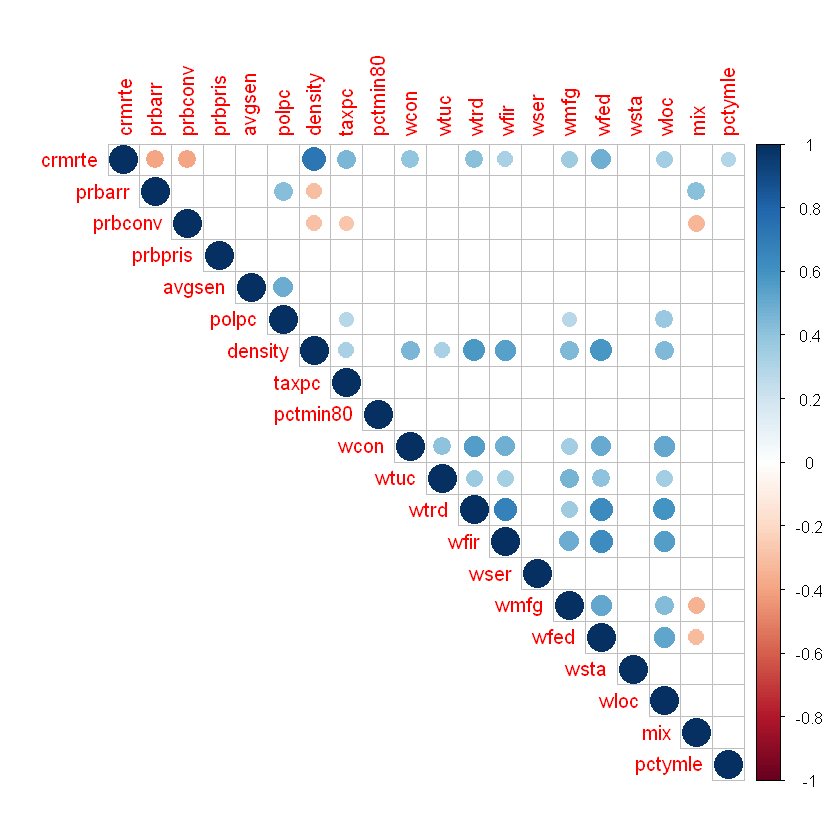

In [26]:
# ++++++++++++++++++++++++++++
# flattenCorrMatrix
# ++++++++++++++++++++++++++++
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}
res2 <- rcorr(as.matrix(crime[,-c(9:11)]))

CorrMat <- flattenCorrMatrix(round(res2$r,2), round(res2$P,2))

# Order the p value from the smallest to the largest

datatable(CorrMat[order(CorrMat$p),],class="cell-border stripe")


# Insignificant correlations are leaved blank
corrplot(res2$r, type="upper", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")

## citation: 
## http://www.sthda.com/english/wiki/
## correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

## Testing a specific use case
Apply log transformation on “polpc” to achieve linearity between “crmrte” and “polpc”

\begin{align}
H_0: &\text{there is no linear relationship between polpc and crmrte} \\
H_a: &H_0 \space \text{is not true}
\end{align}

In [31]:
p.value.cor.test <- cor.test(crime$polpc, crime$crmrte)$p.value
noquote(paste(ifelse(p.value.cor.test<0.05, 
                     "We reject the null at 5% leve", 
                     "We do not reject the null at 5% level")))

[1] We do not reject the null at 5% level

From the test above we don't have enough evidence to conclude there is any linear relationship between polpc & crmrte. Now we take a log transformation on polpc, and to test if there any linear relationship between log(polpc) & crmrte. 

In [32]:
p.value.cor.test.log <- cor.test(log(crime$polpc), crime$crmrte)$p.value
p.value.cor.test.log
noquote(paste(ifelse(p.value.cor.test.log<0.05, "We reject the null at 5% leve", "We do not reject the null at 5% level")))

[1] 0.0001248184

[1] We reject the null at 5% leve

In [ ]:
# refernce code:
#plot(crime$prbarr,crime$wcon)
# p.value.cor.test <- cor.test(crime$prbarr, crime$wcon)$p.value
# p.value.cor.test
# #reject H0 - meaning there is a linear relationships...
# model = lm(crime$wcon~crime$prbarr)
# plot(crime$prbarr,crime$wcon )
# abline(model)
# summary(model)
# boxplot(crime$prbarr)
# boxplot (crime$wcon)
# # dim (crime)

## IV. Are your choices supported by EDA? You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be interspersed with your model building. Use visual tools to guide your decisions.

### Exploratory Data Analysis (EDA)

#### Descriptive Statistics

In [30]:
# We already performed initial data quality assesment and cleaning after the data load
stargazer(crime, title="Descriptive Statistics", type = "text", digits=2, out="Table1.html")


Descriptive Statistics
Statistic N   Mean  St. Dev.  Min   Pctl(25) Pctl(75)   Max   
--------------------------------------------------------------
crmrte    91  0.03    0.02    0.01    0.02     0.04     0.10  
prbarr    91  0.29    0.14    0.09    0.21     0.34     1.09  
prbconv   91 47.75   26.09     3      25.5      70       92   
prbpris   91  0.41    0.08    0.15    0.36     0.46     0.60  
avgsen    91  9.65    2.85    5.38    7.34    11.42    20.70  
polpc     91 0.002   0.001   0.001   0.001    0.002     0.01  
density   91  1.43    1.51   0.0000   0.55     1.57     8.83  
taxpc     91 38.06   13.08   25.69   30.66    40.95    119.76 
pctmin80  91 25.50   17.02    1.28    9.85    38.14    64.35  
wcon      91 285.36  47.49   193.64  250.78   314.79   436.77 
wtuc      91 411.67  77.27   187.62  374.63   443.44   613.23 
wtrd      91 211.55  34.22   154.21  190.86   225.13   354.68 
wfir      91 322.10  53.89   170.94  286.53   345.35   509.47 
wser      91 275.56  206.25  13

#### Histgorams and Boxplots

In [ ]:
# use for loop go generate histograms & boxplots for all numeric variables  

names<-names(crime) # get the varialbe names in data crime
classes<-sapply(crime,class) # get the data class for each variable in data crime

for(name in names[classes == 'numeric']){#only select variable classes are numeric
  # dev.new()
  hist(crime[,name], xlab=paste(name), main=paste("Histogram of",name,sep=" ")) # subset with [] not $
  boxplot(crime[,name],main=paste("Boxplot of",name,sep=" "))
}

### System Recomendation for the variables selection 


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)


Best Subset Model: Regsubsets Function
                          Dependent variable:       
                    --------------------------------
                                 crmrte             
----------------------------------------------------
prbarr                 -0.046*** (-0.064, -0.027)   
prbconv              -0.0002*** (-0.0002, -0.0001)  
polpc                   3.962*** (1.425, 6.499)     
density                 0.005*** (0.003, 0.007)     
taxpc                  0.0003*** (0.0001, 0.0004)   
pctmin80               0.0003*** (0.0002, 0.0005)   
wser                -0.00001*** (-0.00002, -0.00000)
wfed                  0.00005** (0.00001, 0.0001)   
pctymle                 0.119*** (0.031, 0.208)     
Constant                 -0.005 (-0.029, 0.019)     
----------------------------------------------------
Observations                       91               
R2                               0.806              
Adjusted R2                      0.784              
Residu


Best Subset Model: Step Function
                          Dependent variable:       
                    --------------------------------
                                 crmrte             
----------------------------------------------------
density                 0.005*** (0.003, 0.007)     
prbconv              -0.0001*** (-0.0002, -0.0001)  
prbarr                 -0.046*** (-0.064, -0.027)   
polpc                   4.800*** (2.115, 7.486)     
pctmin80               0.0003*** (0.0002, 0.0004)   
wser                -0.00001*** (-0.00002, -0.00001)
avgsen                  -0.001 (-0.001, 0.0002)     
pctymle                 0.128*** (0.041, 0.215)     
taxpc                  0.0003*** (0.0001, 0.0004)   
wfed                  0.0001*** (0.00002, 0.0001)   
wfir                  -0.00004 (-0.0001, 0.00001)   
Constant                 0.001 (-0.023, 0.026)      
----------------------------------------------------
Observations                       91               
R2          

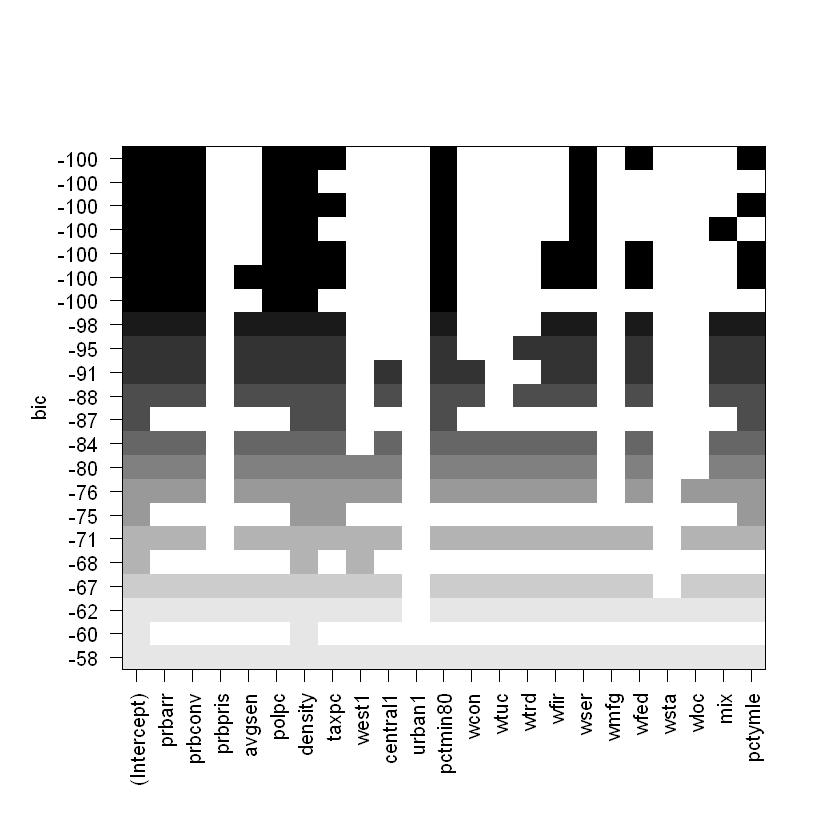

In [34]:
# it takes a long time because If there are n independent variables, 
# the number of possible nonempty subsets is 2^n - 1. 

regfit.full <- regsubsets(crmrte ~ ., data = crime, nvmax=NULL, method="exhaustive")
reg.m.out <- summary(regfit.full)
reg.m.regtab <- cbind.data.frame( round(reg.m.out$rsq,4), round(reg.m.out$adjr2,4), 
                                 round(reg.m.out$bic,4),reg.m.out$which) # stich things together
colnames(reg.m.regtab) <- c("R^2","Adj R^2","bic",colnames(reg.m.regtab)[4:26])
datatable(reg.m.regtab[order(reg.m.regtab[,3]),])
plot(regfit.full, scale="bic")
datatable(data.frame(coef(regfit.full, 9)))

best_regsub_model <- lm(crmrte~prbarr+prbconv+polpc+density+taxpc+pctmin80+wser+wfed+pctymle,data=crime)
stargazer(best_regsub_model,type="text", title="Best Subset Model: Regsubsets Function", 
          align=T, ci=T, ci.level=.95, single.row=T)

### another package in r
### step function 

# Forward/Backward/Stepwise Regression Using AIC
nullmodel = lm(crmrte ~ 1, data = crime)
fullmodel = lm(crmrte ~ ., data = crime)

model.step <- step(nullmodel, scope = list(lower = nullmodel,
upper = fullmodel),direction = "both")

best_step <- formula(model.step)
best_step_model <- lm(best_step,data=crime) 

stargazer(best_step_model,type="text", title="Best Subset Model: Step Function", 
          align=T, ci=T, ci.level=.95, single.row=T)

In [35]:
best_step

crmrte ~ density + prbconv + prbarr + polpc + pctmin80 + wser + 
    avgsen + pctymle + taxpc + wfed + wfir

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

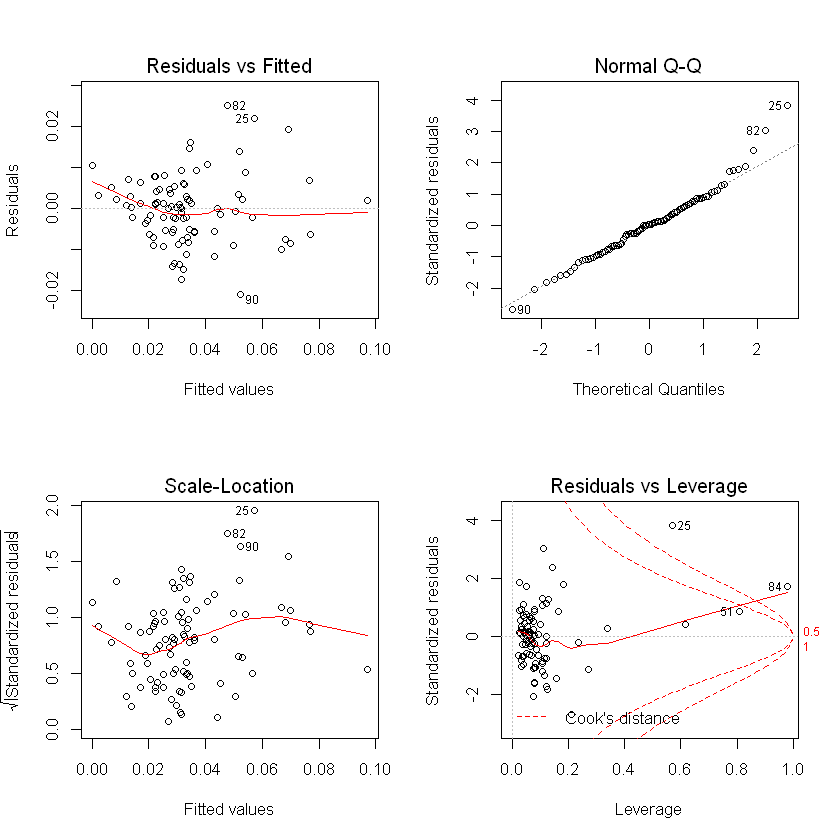

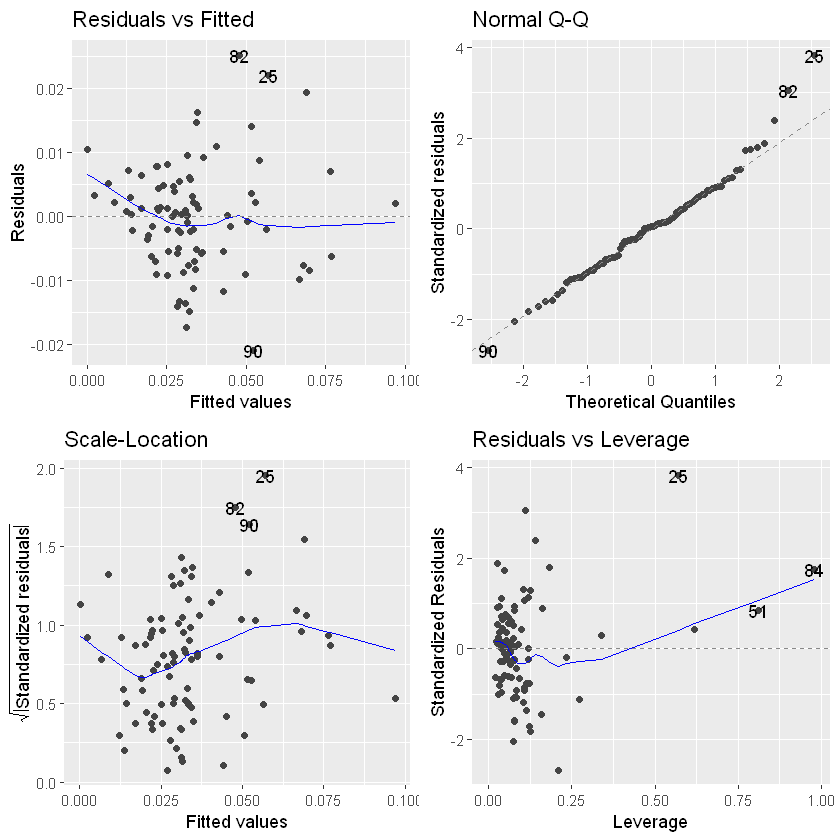

In [36]:
par(mfrow=c(2,2))
plot(best_regsub_model) 
par(mfrow=c(1,1))

# or 

autoplot(best_regsub_model)

**Comparing the models we have now**

In [41]:
# Comparing the models we have now

stargazer(model1,  best_regsub_model, best_step_model, 
          column.labels = c("Model 1" ,"Regsubsets","Step"),
          type="text", out="Models.html", model.names=T)


                                             Dependent variable:                         
                    ---------------------------------------------------------------------
                                                   crmrte                                
                                                     OLS                                 
                           Model 1               Regsubsets                Step          
                             (1)                    (2)                     (3)          
-----------------------------------------------------------------------------------------
prbarr                    -0.059***              -0.046***               -0.046***       
                           (0.011)                (0.010)                 (0.009)        
                                                                                         
prbconv                   -0.0002***             -0.0002***             -0.0001***       
         

## Three Specifications (Models)

### Model 1

**One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.**

* Response Variable: 

      + crmrte:crimes committed per person
  
* Explanatory Variables: 
      + prbarr: ‘probability’ of arrest
      + prbconv: ‘probability’ of conviction
      + polpc: police per capita
      + taxpc: tax revenue per capita
      
Apply log transformation to variable "polpc"

In [39]:
model1 <- lm(crmrte~prbarr+prbconv+log(polpc)+taxpc+wcon,data=crime)

stargazer(model1,type="text", title="Model 1 Results", align=T, ci=T, ci.level=.95, single.row=T)

## or 

summ(model1,confint=T, digits=4)


Model 1 Results
                         Dependent variable:     
                    -----------------------------
                               crmrte            
-------------------------------------------------
prbarr               -0.059*** (-0.081, -0.038)  
prbconv             -0.0002*** (-0.0003, -0.0001)
log(polpc)             0.018*** (0.010, 0.026)   
taxpc                 0.0002 (-0.0001, 0.0004)   
wcon                 0.0001** (0.00002, 0.0001)  
Constant               0.152*** (0.089, 0.215)   
-------------------------------------------------
Observations                     91              
R2                              0.561            
Adjusted R2                     0.535            
Residual Std. Error        0.013 (df = 85)       
F Statistic            21.727*** (df = 5; 85)    
Note:                 *p<0.1; **p<0.05; ***p<0.01


MODEL INFO:
Observations: 91
Dependent Variable: crmrte
Type: OLS linear regression 

MODEL FIT:
F(5,85) = 21.7270, p = 0.0000
R² = 0.5610
Adj. R² = 0.5352 

Standard errors: OLS
------------------------------------------------------------------
                       Est.      2.5%     97.5%    t val.        p
----------------- --------- --------- --------- --------- --------
(Intercept)          0.1519    0.0881    0.2158    4.7341   0.0000
prbarr              -0.0595   -0.0809   -0.0380   -5.5039   0.0000
prbconv             -0.0002   -0.0003   -0.0001   -4.1725   0.0001
log(polpc)           0.0182    0.0099    0.0265    4.3710   0.0000
taxpc                0.0002   -0.0001    0.0004    1.2724   0.2067
wcon                 0.0001    0.0000    0.0001    2.4937   0.0146
------------------------------------------------------------------

[Linear Regression Assumptions and Diagnostics in R: Essentials](http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/)

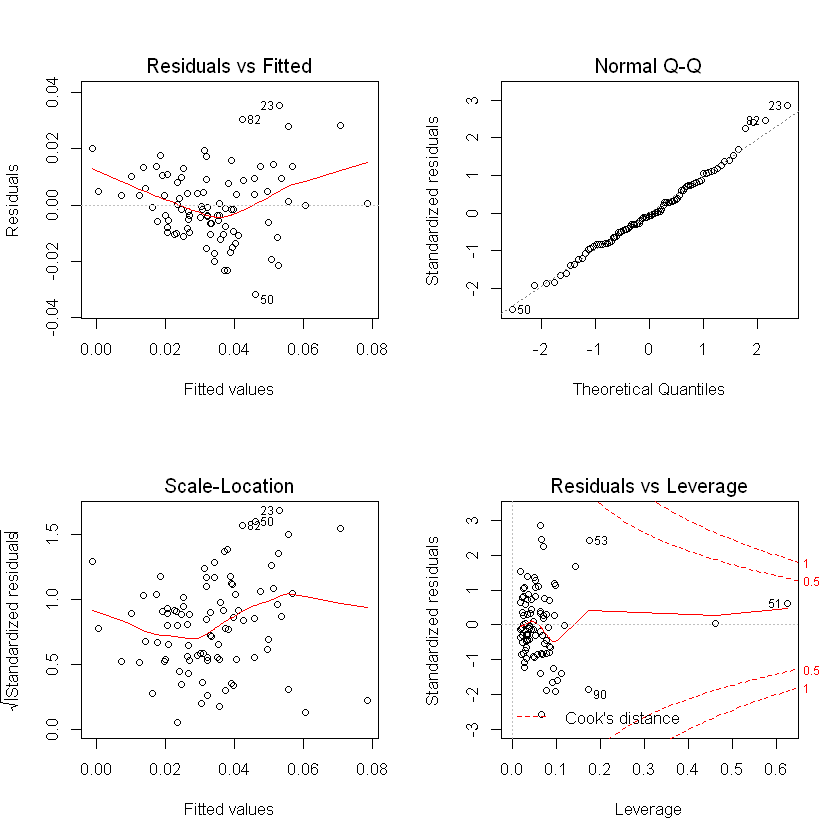

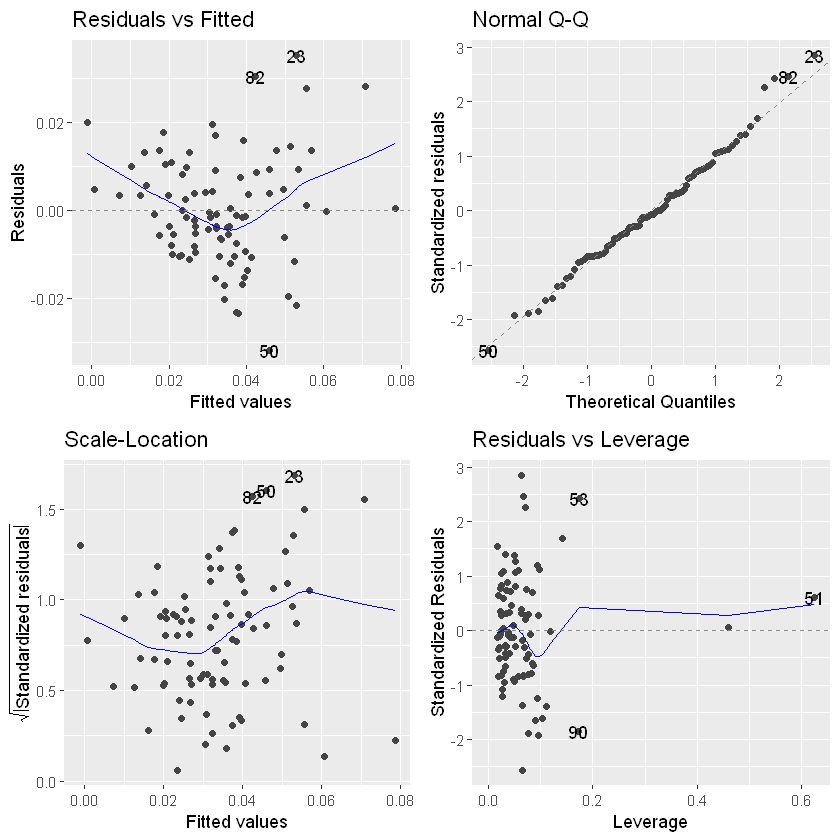

In [40]:
par(mfrow=c(2,2))
plot(model1) 
par(mfrow=c(1,1))

# or 

autoplot(model1)

### Model 2

**One model that includes key explanatory variables and only covariates that you believe increase the accuracy of your results without introducing substantial bias (for example, you should not include outcome variables that will absorb some of the causal effect you are interested in). This model should strike a balance between accuracy and parsimony and reflect your best understanding of the determinants of crime.**

One potential model: 

* Response Variable: 
      + crmrte:crimes committed per person
  
* Explanatory Variables: 
      + prbarr: ‘probability’ of arrest
      + prbconv: ‘probability’ of conviction
      + polpc: police per capita
      + taxpc: tax revenue per capita
      + wcon: weekly wage, construction

* Covariates
      - pctymle: percent young male
      - pctmin80: perc. minority, 1980

Apply log transformation to polpc & pctmin80

In [ ]:
cor.test(log(crime$pctmin80),crime$crmrte)

model2 <- lm(crmrte~prbarr+prbconv+log(polpc)+wcon+pctymle+log(pctmin80), data=crime)

stargazer(model2,type="text", title="Model 2 Result", align=T, ci=T, ci.level=.95, single.row=T)

# or 

summ(model2,confint=T, digits=4)

In [ ]:
par(mfrow=c(2,2))
plot(model2) 
par(mfrow=c(1,1))

# or 

autoplot(model2)

### Model 3

**One model that includes the previous covariates, and most, if not all, other covariates. A key purpose of this model is to demonstrate the robustness of your results to model specification.**

One potential model: 

* Response Variable: 
      + crmrte:crimes committed per person
  
* Explanatory Variables: 
      + prbarr: ‘probability’ of arrest
      + prbconv: ‘probability’ of conviction
      + polpc: police per capita
      + taxpc: tax revenue per capita
      + wcon: weekly wage, construction

* Covariates
      - pctymle: percent young male
      - pctmin80: perc. minority, 1980
      - density: people per sq. mile
      - wcon: weekly wage, construction
      - wser: wkly wge, service industry
      - wfed: wkly wge, fed employees
      

In [ ]:
model3 <- lm(crmrte~prbarr+prbconv+log(polpc)+wcon+pctymle+log(pctmin80)+density+wcon+wser+wfed, data=crime)

stargazer(model3,type="text", title="Model 3 Result", align=T, ci=T, ci.level=.95, single.row=T)

# or 


summ(model3,confint=T, digits=4)

In [ ]:
par(mfrow=c(2,2))
plot(model3) 
par(mfrow=c(1,1))

# or 

autoplot(model3)

**More Materials on Variable selection in r:** 

[Linear Model Selection and Regularization - Subset Selection Methods](https://rpubs.com/davoodastaraky/subset)

[Satgazer Functoin and the Sumamry of Regression Model](https://www.jakeruss.com/cheatsheets/stargazer/)